# 資料分析與學習基石 hw1
- Name: 黃振宏
- Department: 機械系
- Id: E14046402

In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# load file
pd_data = pd.read_csv('./Reviews.csv')

# only use the first 10000 rows
pd_data = pd_data[:10000]
pd_data.head(10)
check = (pd_data['ProfileName'] == 'c2')

data = pd_data[check]

## 刪除不需要的資料

In [2]:
# remove unused label
pd_profile = pd_data.drop(['Id', 'ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 'Summary', 'Text'], axis=1)


profileUserId = pd_profile.UserId.values

## 計算出現次數

In [3]:
# DataFrame for counting
profile_count = pd.DataFrame(columns=['rowNum', 'UserId', 'ProfileName', 'Score Count', 'Score'])

pc_size = 0
for rowPtr in range(0, profileUserId.size - 1):
    # find profile in profile_count and save in pc_find
    pc_find = profile_count.loc[profile_count['UserId'] == profileUserId[rowPtr]]
    rowSize, columnSize = pc_find.shape
    
    # if the profile no in the profile_count set, add it
    if rowSize == 0:
        profile_count.loc[pc_size] = pd_profile.loc[rowPtr]
        profile_count.loc[pc_size, 'Score Count'] = 1
        profile_count.loc[pc_size, 'rowNum'] = pc_size
        pc_size += 1
    
    # add score and count value
    else:
        profile_count.loc[pc_find.iloc[0, 0], 'Score Count'] += 1    # add count Num
        profile_count.loc[pc_find.iloc[0, 0], 'Score'] += pd_profile.loc[rowPtr, 'Score']    # add score sum

## 計算 mean score and sorting

In [4]:
# calculate mean score
pc_size, width = profile_count.shape
for rowPtr in range(0, pc_size - 1):
    profile_count.loc[rowPtr, 'Score'] /= profile_count.loc[rowPtr, 'Score Count']

In [5]:
# sorting
profile_sorting = profile_count.sort_values(by=['Score Count', 'ProfileName'], ascending=[0, 1])

# reset index
profile_sorting = profile_sorting.reset_index()

# delete unused data
profile_sorting = profile_sorting.drop(['rowNum', 'index'], axis=1)

## Top-10 Reviewer

In [6]:
# rename label
profile_sorting = profile_sorting.rename(index=str, columns={'Score': 'Score Mean'})

profile_sorting.head(10)

,UserId,ProfileName,Score Count,Score Mean
0,A1Z54EM24Y40LL,c2,17,3.88235
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.8
2,A35R32TA60XD57,M. Torma,9,4.11111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5
4,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.42857
5,A3NHUQ33CFH3VM,Citizen John,7,3.14286
6,A3PJZ8TU8FDQ1K,Jared Castle,7,4.71429
7,AP03SDCDB6RBD,"E. OConnor ""erdoreen""",6,4.33333
8,AY12DBB0U420B,Gary Peterson,6,4.5
9,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.66667


## Score Distribution

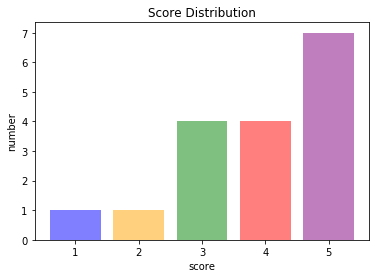

In [7]:
nameList = profile_sorting['ProfileName']

# find most reviews
most_reviews = pd_data[pd_data['ProfileName'] == nameList[0]]

# score distribution
sc_dis = most_reviews['Score'].value_counts()
sc_dis = sc_dis.sort_index()

# diagram index
sc = list(sc_dis.index)
num = list(sc_dis)
y_pos = np.arange(len(sc))

# draw bar diagram
plt.bar(y_pos, num, align = 'center', alpha = 0.5, color = ['b', 'orange', 'g', 'r', 'purple'])
plt.xticks(y_pos, sc)
plt.ylabel('number')
plt.xlabel('score')
plt.title('Score Distribution')

plt.show()

# 每年點擊律

In [8]:
import time

# 秒數換算年份
def yearmapping(time_sec):
    return time.localtime(time_sec).tm_year 

pd_data['Year'] = pd_data['Time'].apply(yearmapping)


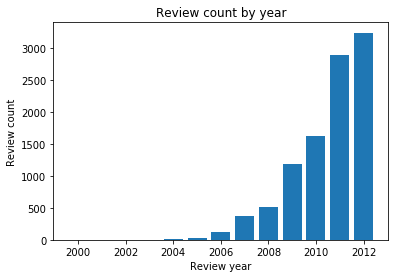

In [9]:
year_list = pd_data['Year'].value_counts()

# the years of zero review
year_zero_reviews = pd.Series([0, 0, 0], index=[2001, 2002, 2003])
year_list = year_list.append(year_zero_reviews)

year_list = year_list.sort_index()

x_year = list(year_list.index)
y_reviews_num = list(year_list)
y_pos = np.arange(len(y_reviews_num))

xLocator = plt.MultipleLocator(2)    # a unit / 2 years
x = [1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012]

plt.bar(y_pos, y_reviews_num, align = 'center')
plt.xticks(y_pos, x)
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')

plt.gca().xaxis.set_major_locator(xLocator)
plt.show()

## correlation between numbers of reviews and date

## HeatMap 

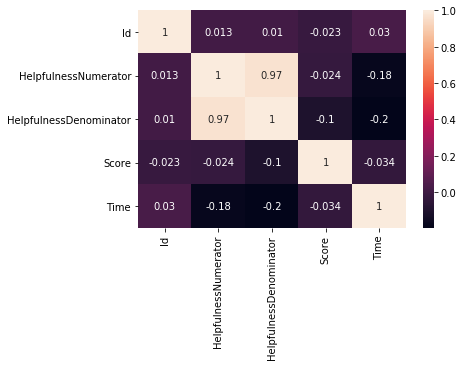

In [10]:
import seaborn as sns
pd_corr = pd_data.drop(['ProductId', 'Summary', 'Text', 'ProfileName', 'UserId', 'Year'], axis=1)

corr = pd_corr.corr()

heatMap = sns.heatmap(corr, annot=True)

## Helpful percent

In [11]:
row_size, column_size = pd_data.shape

for rowNum in range(0, row_size - 1):
    if pd_data.loc[rowNum, 'HelpfulnessNumerator'] > pd_data.loc[rowNum, 'HelpfulnessDenominator']:
        print(rowNum)
        pd_data.loc[rowNum, 'percent'] = -1

    else:
        if pd_data.loc[rowNum, 'HelpfulnessDenominator'] == 0:
            pd_data.loc[rowNum, 'percent'] = -1

        else:
            pd_data.loc[rowNum, 'percent'] = pd_data.loc[rowNum, 'HelpfulnessNumerator'] / pd_data.loc[rowNum, 'HelpfulnessDenominator']

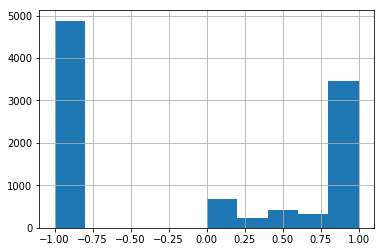

In [12]:
pd_data['percent'].hist(bins=10)